Mean Squared Error: 0.7311
R² Score: 0.9993
Polynomial Regression Equation:
SatTemp = -43.882012 + (0.587223)*Pressure + (-0.001893)*Pressure^2 + (0.000003)*Pressure^3 + (-0.000000)*Pressure^4


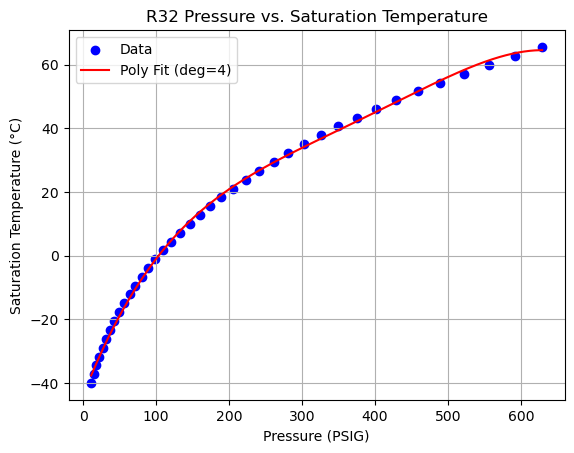

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('R32_P_T.csv')

# Features and target
X = df[['Pressure']]  
y = df['SatTemp']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features
degree = 4  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict
y_pred = model.predict(X_test_poly)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Display the final polynomial equation

# Assuming model and poly were trained
feature_names = poly.get_feature_names_out(['Pressure'])
coefficients = model.coef_
intercept = model.intercept_

# Combine into a readable equation
terms = [f"{intercept:.6f}"] + [f"({c:.6f})*{name}" for c, name in zip(coefficients[1:], feature_names[1:])]
equation = " + ".join(terms)
print("Polynomial Regression Equation:")
print("SatTemp =", equation)


# Plot the results
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_range, y_range_pred, color='red', label=f'Poly Fit (deg={degree})')
plt.xlabel('Pressure (PSIG)')
plt.ylabel('Saturation Temperature (°C)')
plt.title('R32 Pressure vs. Saturation Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
# Predict SatTemp at 628 PSIG
P_input = np.array([[628]])
P_input_poly = poly.transform(P_input)
T_pred = model.predict(P_input_poly)
print(f"Predicted Sat. Temp at 628 PSIG: {T_pred[0]:.2f} °C")

Predicted Sat. Temp at 628 PSIG: 64.58 °C


In [42]:
def manual_prediction(P):
    return (
        model.intercept_
        + model.coef_[1] * P
        + model.coef_[2] * P**2
        + model.coef_[3] * P**3
        + model.coef_[4] * P**4  # up to the degree you used
    )

P = 628.8
print(model.intercept_,model.coef_)
print(f"Manual prediction at {P} PSIG: {manual_prediction(P):.2f} °C")


-43.882012211246234 [ 0.00000000e+00  5.87222735e-01 -1.89306083e-03  3.30864655e-06
 -2.14209979e-09]
Manual prediction at 628.8 PSIG: 64.59 °C
